In [1]:
##7.1투표기반분류기##
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [3]:
import numpy as np

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, Y_train)

#개별분류기의 예측을 평균내어 확률이 가장 높은 클래스예측
#확률을 추정하기위해 교차검증 사용, 훈련속도 느리지만 정확함
voting_proba_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_proba_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    #각 분류기의 테스트셋 정확도 출력
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))
    
#각 분류기의 개별성능보다 투표기반분류기의 성능이 더 높다

LogisticRegression 0.864
RandomForestClassifier 0.848
SVC 0.888
VotingClassifier 0.888


C:\Users\Sun\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_proba_clf):
    #각 분류기의 테스트셋 정확도 출력
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))
    
#각 분류기의 개별성능보다 투표기반분류기의 성능이 더 높다

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.888
VotingClassifier 0.904


C:\Users\Sun\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [8]:
##7.2.1 배깅##
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1) #페이스팅을 사용하려면 bootstrap=False
bag_clf.fit(X_train, Y_train)
Y_pred = bag_clf.predict(X_test)

print('Accuracy =', accuracy_score(Y_test, Y_pred))
#샘플을 중복선택하면 배깅, 이미 뽑은 샘플은 선택하지 않으면 페이스팅

Accuracy = 0.928


In [9]:
##7.2.2 oob 평가##
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True) #선택되지 않은 샘플로 평가

bag_clf.fit(X_train, Y_train)
bag_clf.oob_score_

0.896

In [10]:
from sklearn.metrics import accuracy_score

Y_pred = bag_clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.904

In [11]:
bag_clf.oob_decision_function_ #oob샘플에 대한 결정함수의 값, 확률값으로 나타남

array([[0.40298507, 0.59701493],
       [0.27419355, 0.72580645],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06417112, 0.93582888],
       [0.375     , 0.625     ],
       [0.01578947, 0.98421053],
       [0.99425287, 0.00574713],
       [0.96354167, 0.03645833],
       [0.70414201, 0.29585799],
       [0.015625  , 0.984375  ],
       [0.74468085, 0.25531915],
       [0.84293194, 0.15706806],
       [0.97660819, 0.02339181],
       [0.06603774, 0.93396226],
       [0.        , 1.        ],
       [0.96794872, 0.03205128],
       [0.97076023, 0.02923977],
       [0.9893617 , 0.0106383 ],
       [0.02463054, 0.97536946],
       [0.35789474, 0.64210526],
       [0.92261905, 0.07738095],
       [1.        , 0.        ],
       [0.97790055, 0.02209945],
       [0.        , 1.        ],
       [0.98924731, 0.01075269],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.62777778, 0.37222222],
       [0.

In [17]:
##랜덤 패치##
BaggingClassifier(
    DecisionTreeClassifier(),
    bootstrap=True, max_samples=0.5,
    bootstrap_features=True ,max_features=0.5) #훈련 특성과 샘플을 모두 샘플링

##랜덤 서브스페이스##
BaggingClassifier(
    DecisionTreeClassifier(),
    bootstrap=False, max_samples=1.0,
    bootstrap_features=True ,max_features=0.5) #훈련샘플은 모두 사용, 훈련 특성은 샘플링

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=True, max_features=0.5,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [24]:
##7.4 랜덤 포레스트##
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, Y_train)

Y_pred = rnd_clf.predict(X_test)

#랜덤포레스트는 트리의 노드를 분할하래 최적의 특성을 찾는대신 무작위 특성을 기준으로 분류
#무작위성 증가, 트리의 다양성 증가

In [23]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, Y_train)
Y_pred = bag_clf.predict(X_test)

#BaggingClassifier를 사용해 RandomForestClassifier를 만든 것

In [25]:
##7.4.1 엑스트라트리##
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ext_clf.fit(X_train, Y_train)

Y_pred = ext_clf.predict(X_test)

#엑스트라 트리는 무작위 특성을 선택해 불할 후 그중 최선의 분할을 선택
#특성마다 최적의 임계값을 찾는 작업이 없어서 랜덤포레스트보다 빠름

In [26]:
##7.4.2 특성중요도##
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)
    
#랜덤포레스트는 어떤 특성이 중요한지 빠르게 확인가능

sepal length (cm) 0.09844329577601851
sepal width (cm) 0.023069107197630903
petal length (cm) 0.4274780860526656
petal width (cm) 0.45100951097368525


In [28]:
##7.5.1 아다부스트##
#https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-14-AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, #리프노드가 2개인 결정트리 사용
    algorithm="SAMME.R", learning_rate=0.5) #SAMME.R을 쓰면 예측기가 확률을 추정할수 있다면 클래스 확률값 사용
ada_clf.fit(X_train, Y_train)

#에러율이 낮은 예측기의 결과값이 더 많이 반영되게 함

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [40]:
##7.5.2 그래디언트 부스팅##
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
Y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, Y)

#이전 예측기가 만든 잔여오차에 새로운 예측기를 학습

Y2 = Y - tree_reg1.predict(X) #잔여오차
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, Y2)

Y3 = Y2 - tree_reg2.predict(X) #잔여오차
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, Y3)

X_new = np.array([[0.8]])  # new data
Y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3)) #각 예측기의 모든 결과 합침
print(Y_pred)

[0.75026781]


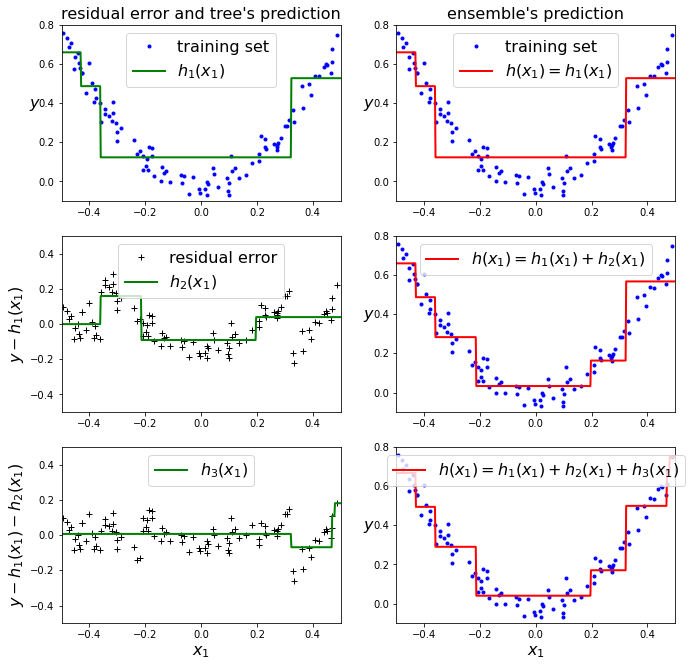

In [45]:
from matplotlib import pyplot as plt

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, Y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("residual error and tree's prediction", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, Y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("ensemble's prediction", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, Y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="residual error")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, Y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, Y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, Y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

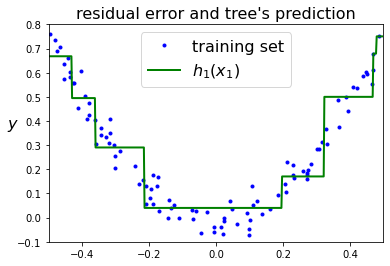

In [52]:
#사이킷런의 그래디언트부스팅 사용하기
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, Y)

plot_predictions([gbrt], X, Y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("residual error and tree's prediction", fontsize=16)
plt.show()

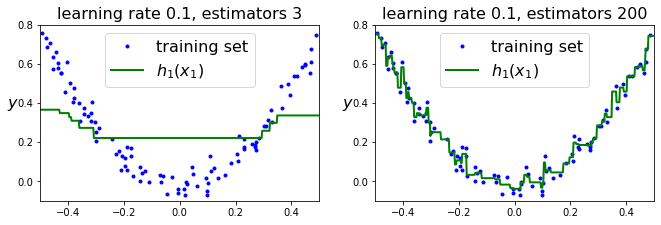

In [60]:
plt.figure(figsize=(11,11))

gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1) #학습률 0.1, 예측기 3개
gbrt1.fit(X, Y)

plt.subplot(321)
plot_predictions([gbrt1], X, Y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("learning rate 0.1, estimators 3", fontsize=16)

gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1) #학습률 0.1, 예측기 200개
gbrt2.fit(X, Y)

plt.subplot(322)
plot_predictions([gbrt2], X, Y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("learning rate 0.1, estimators 200", fontsize=16)

plt.show()

In [80]:
#그래디언트 부스팅의 과적합을 조기종료로 막기
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, Y_train, Y_val = train_test_split(X, Y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=150)
gbrt.fit(X_train, Y_train)

#staged_predict 메소드는 훈련의 각 단계에서 앙상블에 의해 만들어진 예측기를 순회하는 반복자 반환
errors = [mean_squared_error(Y_val, Y_pred) for Y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors) #에러가 가장작은 인덱스 반환

#무작위 25% 샘플로 훈련, 확률적 그래디언트 부스팅, 편향 높아지고 분산 낮아짐, 훈련속도 빠름
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, subsample=0.25)
gbrt_best.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=37, presort='auto', random_state=None,
             subsample=0.25, verbose=0, warm_start=False)

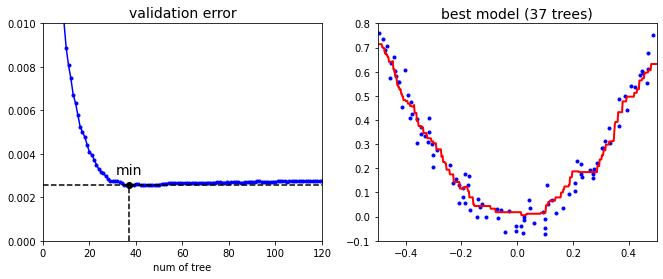

In [81]:
min_error = np.min(errors)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "min", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("num of tree")
plt.title("validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, Y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("best model (%d trees)" % best_n_estimators, fontsize=14)

plt.show()